As a soccer fan I am all too familiar with the tendency of fans and media to have and perpertuate certain ideas about the game, be it about certain players, teams or even entire leagues. I have done it myself over the years and especially in the service of bragging to fans of rival teams. However, as a data professional I have come to believe that it is not sufficient for me to hold or accept these narratives without investigating them myself. I have decided that even if my investigation leads to a conclusion that challenges my own deeply rooted narrativves about the sport, it is worth it because I would feel a lot better sharing information that I know to be true, and getting rid of any preconceived notions that are not supported by data.
A narrative that I had a few months ago was that the English Premier League does not compare to other European leagues when it comes to the number of highly talented dribblers. This came after I had finished watching a game in which Rafael Leao of AC Milan(Italian Serie A) had run rampant against defenders, which had me thinking that we do not see that enough in the English league. This is when I decided to consult the data and find out if this narrative holds any water. 
So, I went about collective and preparing the necessary data before diving in to uncover the truth. 

In [ ]:
from soccerdata import FBref

reader = FBref(seasons='2324')

players = reader.read_player_season_stats(stat_type='possession')

players.columns = ['_'.join(col).strip() for col in players.columns.values]


flat_players = players.reset_index()


flat_players['league'].unique()

best_dribblers = flat_players[flat_players['Take-Ons_Succ'] > 50]

top_dribblers = best_dribblers.sort_values(by='Take-Ons_Succ', ascending=False).head(50)

#df['new_column'] = df['existing_column'].apply(lambda x: 'Yes' if x == 3 else 'No')

top_dribblers['PL or Not'] = top_dribblers['league'].apply(lambda x: 'PL' if x == 'ENG-Premier League' else 'Other League')
wing_dribblers = best_dribblers[best_dribblers['player'].isin(['Cody Gakpo', 'Marcus Rashford', 'Bukayo Saka', 'Gabriel Jesus', 'Khvicha Kvaratskhelia', 'Vinicius Júnior', 'Jamal Musiala', 'Michael Olise', 'Leroy Sane', 'Bradley Barcola'])]




Having created the dataframe of top 50 dribblers based on successful take-ons completed, I can now check to see which league is the most represented in the top 50.

In [10]:
top_dribblers['league'].value_counts()

,count
league,
ENG-Premier League,14
ESP-La Liga,13
FRA-Ligue 1,11
GER-Bundesliga,7
ITA-Serie A,5


To my surprise, the premier league has more players in the top 50, which is not what I expected going into the analysis.
This has me wondering if the idea of dribblers being speedy wingers influenced my expectation that the premier league would not have the most representation. In order to answer this question, I am now going to look at the positions of these players to see which position is most represented.

In [14]:
top_dribblers['pos_'].value_counts()

,count
pos_,
FW,15
"FW,MF",12
"MF,FW",11
MF,6
DF,4
"DF,MF",1
"MF,DF",1


As expected, most the players in the top 50 are FW and FW,MF. This makes sense, most wide attacking players are often labeled as Forward/Midfielder. However, this still does not answer my question as to why they perception I had of the English premier league not having many dribblers. There is more I can do to flesh this out. I am going to look at the positions of the player who represent the English league on the list.

In [18]:
top_dribblers[top_dribblers['league']=='ENG-Premier League']['pos_'].value_counts()

,count
pos_,
"FW,MF",4
"MF,FW",3
FW,3
MF,2
"DF,MF",1
"MF,DF",1


Having looked at the position, I can conclude that most of them are attacking players, so I cannot say that my perception was influenced by their position because when one thinks of dribblers the first thing that comes to mind is attacking players, and mostly this is true for the premier league as well based on the data.
Now I will look at these players' names for one last bit of insight before visualizing the data.

In [19]:
top_dribblers[top_dribblers['league']=='ENG-Premier League']['player']


,player
545,Mohammed Kudus
349,Jeremy Doku
403,Bruno Guimarães
213,Eberechi Eze
305,Luis Díaz
335,Ross Barkley
566,Matheus Cunha
574,Rayan Aït-Nouri
320,Chiedozie Ogbene
41,Leon Bailey


Looking at these names, it is clear to see why one would not easily assume the premier does not have many great dribblers, because this is perception is influenced heavily by the name recognition of the players, and most of these players do not enjoy the name recognition that some of the best dribblers in Europe have. Thankfully the data does not rely on that and it has shown clearly how much they stand out.

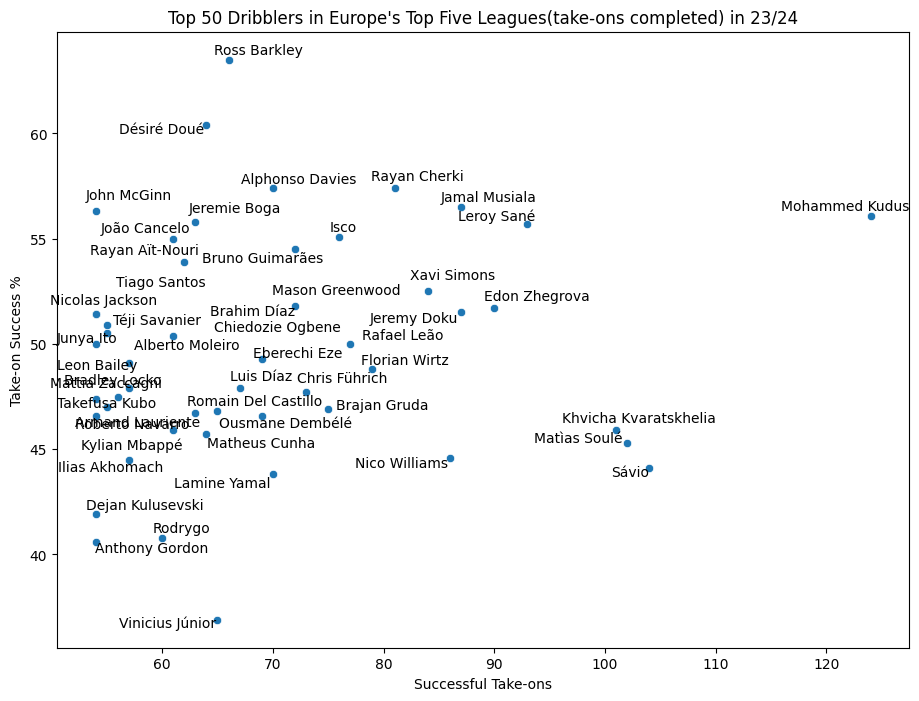

In [24]:
from adjustText import adjust_text
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 8))
scatter_plot = sns.scatterplot(top_dribblers, x="Take-Ons_Succ", y="Take-Ons_Succ%")
plt.xlabel('Successful Take-ons')
plt.ylabel('Take-on Success %')
plt.title("Top 50 Dribblers in Europe's Top Five Leagues(take-ons completed) in 23/24")

# Annotate each point with its label
texts = []
for i, row in top_dribblers.iterrows():
    texts.append(scatter_plot.text(row['Take-Ons_Succ'], row['Take-Ons_Succ%'], row['player'], fontsize=10, ha='right'))

# Adjust the layout to prevent labels from overlapping
adjust_text(texts)

plt.show()



The scatterplot shows in no uncertain terms just how much better of a dribbler Mohammed Kudus was than everyone else during the 2023/24 season. It also highlights Ross Barkley, who went under the radar, having player for Luton team that ended up getting relegated.

My conclusion is that the premier has the best dribbler in Europe in Mohammed Kudus, as shown by his high number of successful take ons and high efficiency. I am also going to highlight Vinicius Junior, who enjoys a great reputation as a great dribbler but the data shows him to be on the lower end of the top dribblers in Europe, which brings into serious question the way fans and media perceive players. It may also that this brings into question how we define a 'dribble', but this was not the scope of this analysis.